#importing necessary libraries

In [7]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data

In [8]:
with open('C:\\Users\\am998\\OneDrive\\Desktop\\Loan_approval\\loan_approval_analysis\\data\\raw\\loan_approval_dataset.json') as f:
    data = json.load(f)

In [10]:
# Convert the data to a pandas dataframe
df= pd.DataFrame(data)

In [11]:
# Display the first 5 rows of the dataframe
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [12]:
df.columns 

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [13]:
# Display the shape of the dataframe
df.shape

(252000, 13)

In [15]:
# Display the data types of the columns
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [16]:
#describe the data
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [17]:
# Display the number of missing values in each column
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [18]:
# Display the number of unique values in each column
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

#Visualizing the data

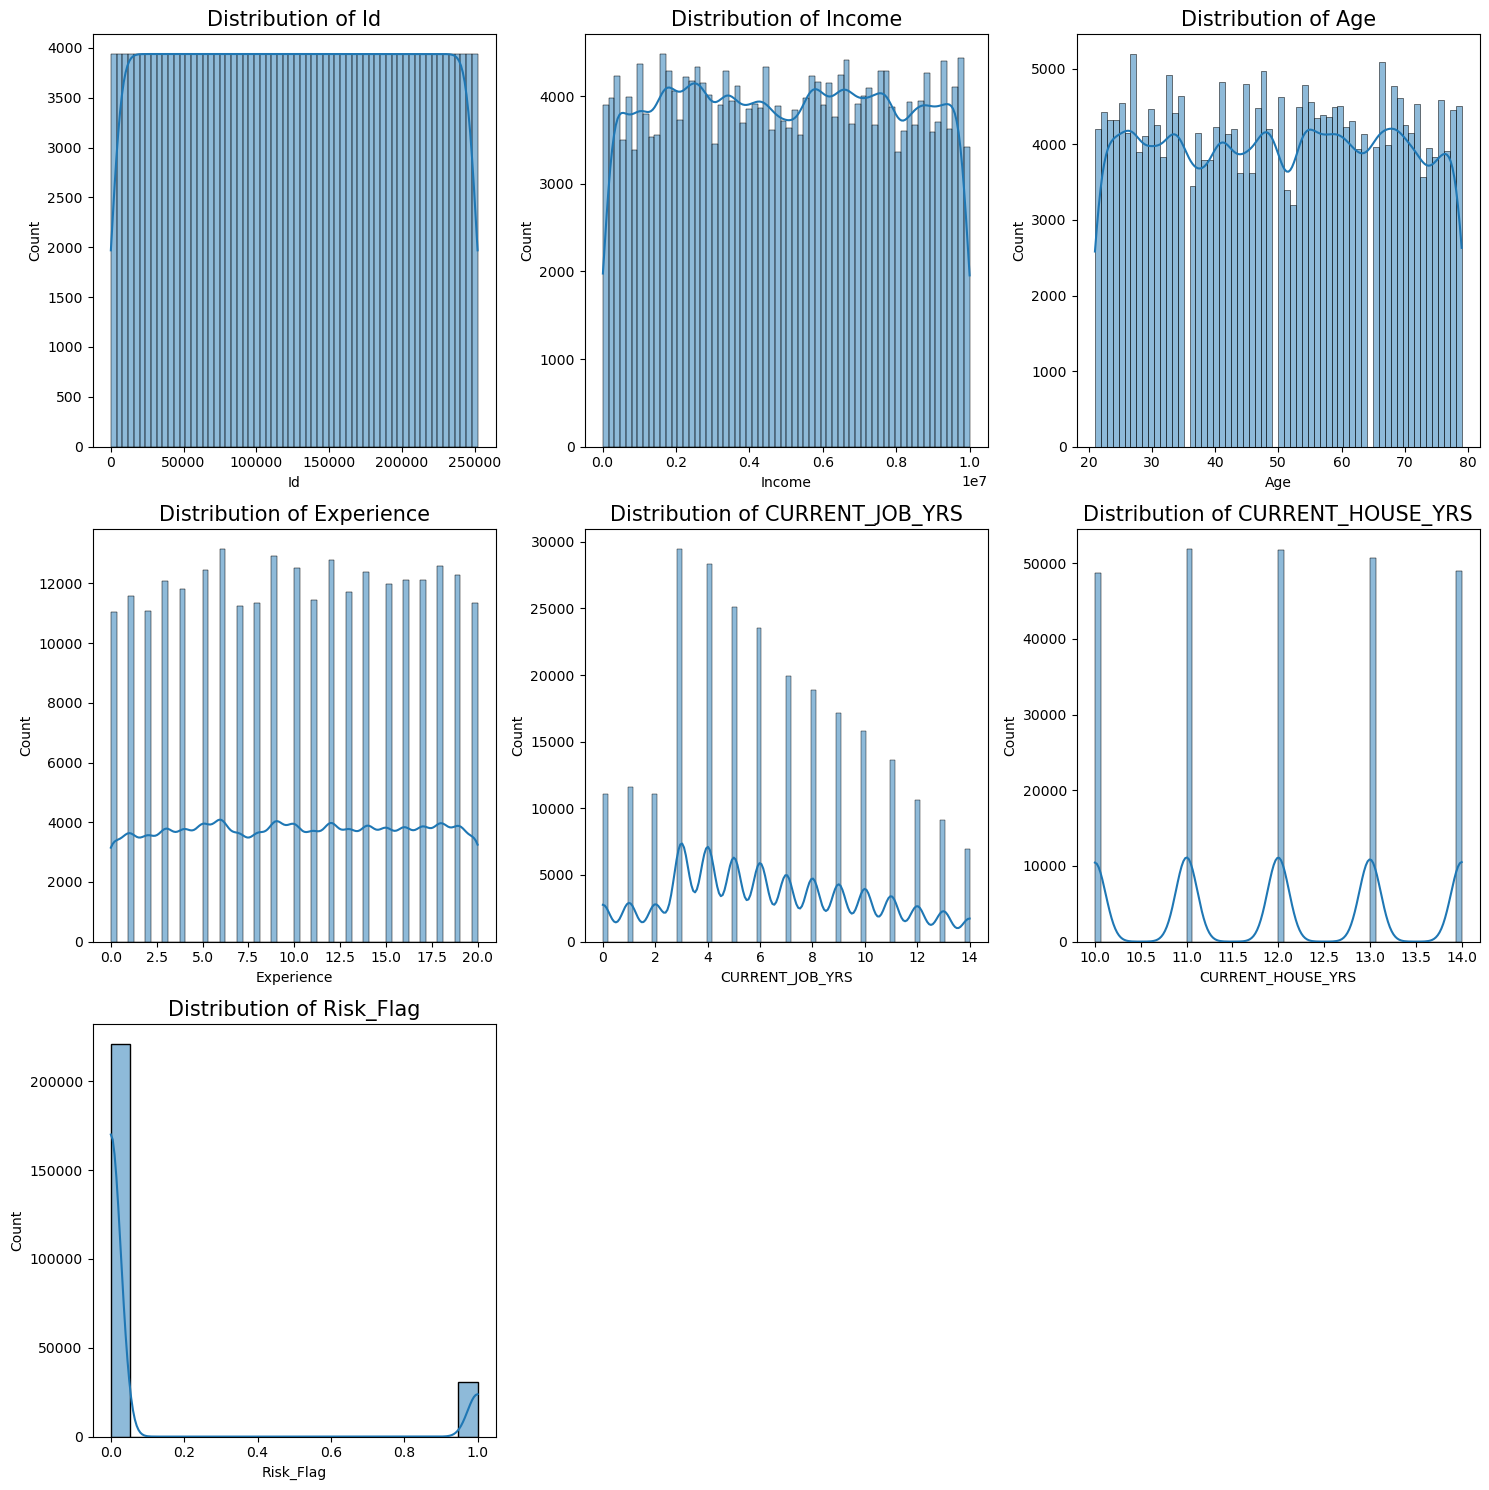

In [19]:
#Checking the distribution of the variables
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate suitable grid dimensions for subplots
grid_cols = 3
grid_rows = len(numerical_cols) // grid_cols
if len(numerical_cols) % grid_cols != 0:
    grid_rows += 1

# Create subplot grid
fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(15, grid_rows*5))

# Flatten the axes array and delete any excess subplot
axs = axs.flatten()
for ax in axs[len(numerical_cols):]:
    fig.delaxes(ax)

# Loop over numerical columns and create a distribution plot for each
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}', fontsize=15)

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
#Checking the skewness of the variables
df.skew()

C:\Users\am998\AppData\Local\Temp\ipykernel_4656\3846438183.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Id                   0.000000
Income               0.005958
Age                 -0.005316
Experience          -0.012779
CURRENT_JOB_YRS      0.273146
CURRENT_HOUSE_YRS    0.006786
Risk_Flag            2.295734
dtype: float64

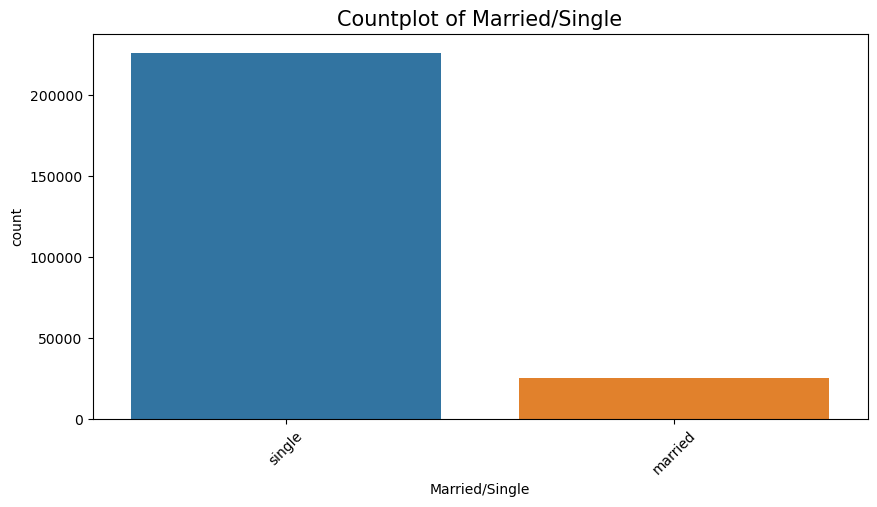

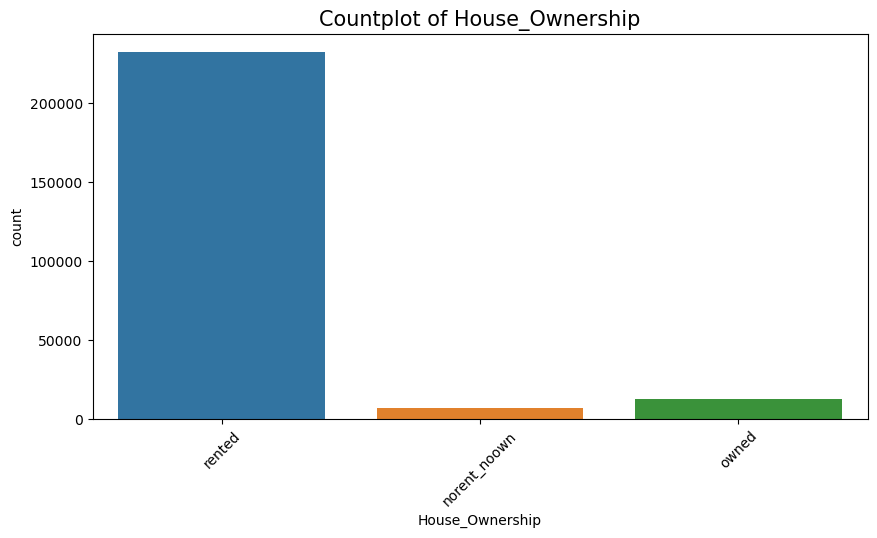

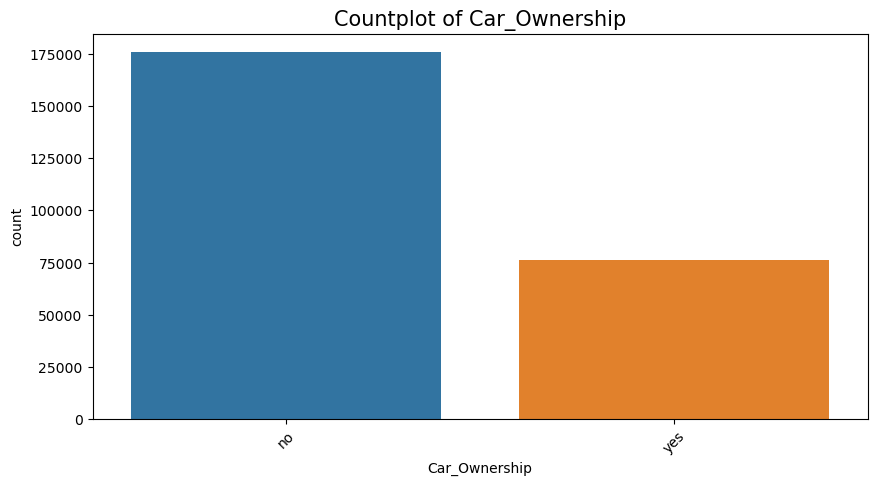

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns of interest
cols_of_interest = ['Married/Single', 'House_Ownership', 'Car_Ownership']

# Loop over columns of interest and create a countplot for each
for col in cols_of_interest:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

In [28]:
df["Profession"].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

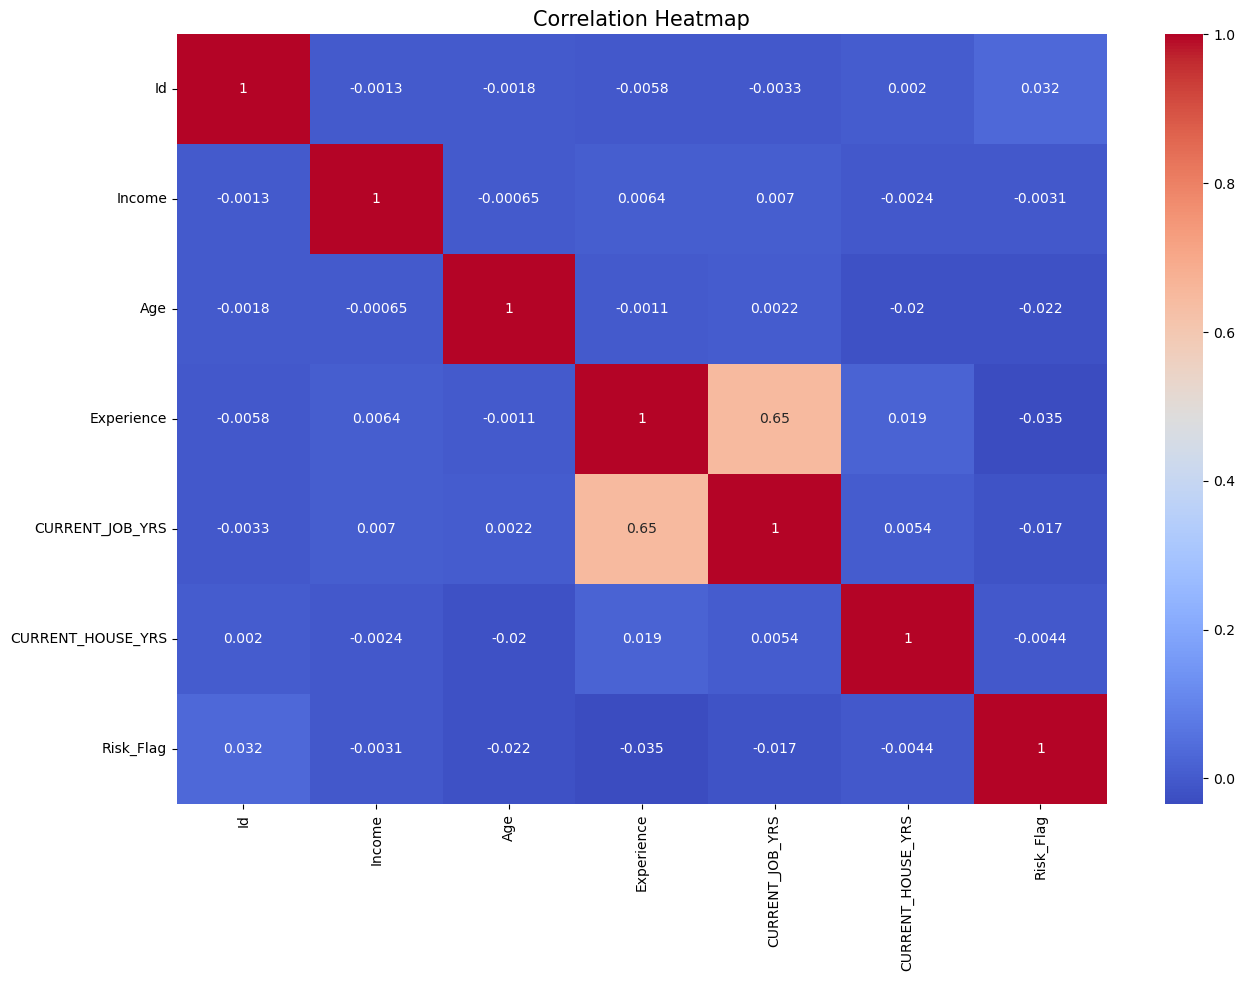

In [31]:
#Correlation Analysis
corr=df.corr()

#Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()
